1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [2]:
import numpy as np

#array of length 100 with normally distributed numbers
mu = 0
sigma = 7
N = 150
x = np.random.normal(loc=mu, scale=sigma, size=N)

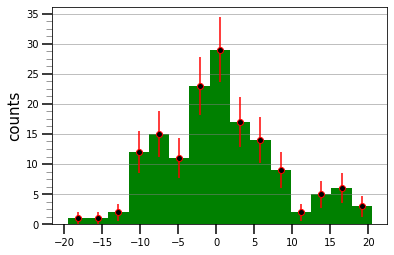

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, MaxNLocator
%matplotlib inline

#pyplot histograms
fig, ax = plt.subplots()

#ax: aesthetic
ax.hist(x, bins=15, color='green') #number of bins and color
ax.set_ylabel('counts', fontsize=15) #y axis label
ax.yaxis.set_major_locator(MaxNLocator(integer = True)) #major tick (integers)
ax.yaxis.set_minor_locator(AutoMinorLocator(4)) #4 minor ticks for each major one
ax.yaxis.set_major_locator(MultipleLocator(5)) #multiples of 5 on axis
ax.tick_params(which='major', length=10, color='black', width=1.5)
ax.tick_params(which='minor', length=6 , color='gray', width=0.8)
ax.grid(axis='y', color='gray', linestyle='-', linewidth=0.5)
bin_counts, bin_edges, _ = ax.hist(x, bins=15, color='green') #save bin counts and edges on arrays
bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2 #calculate bin centers
y_error = np.sqrt(bin_counts) #assign poisson error
ax.errorbar(x=bin_centres, y=bin_counts, yerr=y_error, fmt='o', color='r', ecolor='r', mfc='black') #plot errorbars
plt.show()



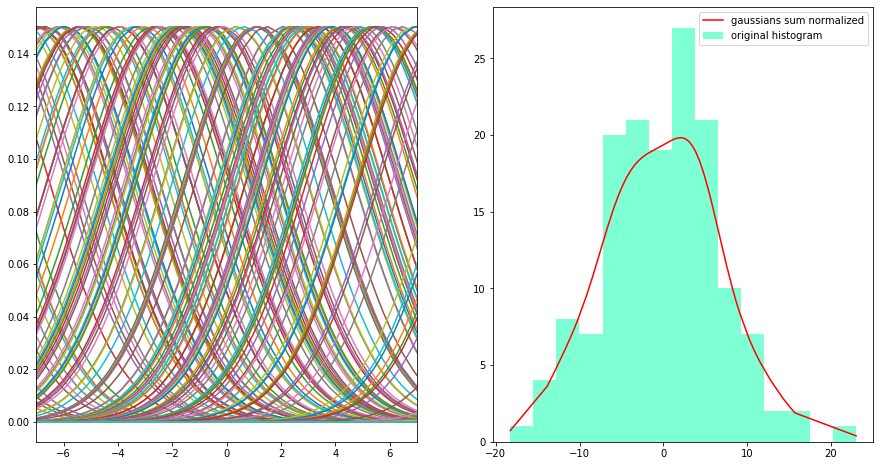

In [52]:
from scipy.stats import norm
from scipy.integrate import trapz

fig, (gauss1, gauss2) = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

#gauss1: gaussian for every element in array x
x_values = np.sort(x) #array for x axis
std = 1.06 * x.std() * pow(x.size,-0.2) #std error
gaussians = [] #empty list of gaussians to be filled
gauss1.set_xlim(-7, 7)

for value in x_values:
    y_value = norm.pdf(x_values, loc=value, scale=std) #gaussian
    gauss1.plot(x_values, y_value)
    gaussians.append(y_value) #for next point
    
#gauss2: normalized sum of gaussians and original histogram
gauss_sum = np.sum(gaussians, axis = 0) #sum of gaussians on 1st axis 
#dx = (x.max()-x.min())/N #spacing between sample points
gauss2.hist(x, bins = 15, color = 'aquamarine', label='original histogram') #original histogram without errorbars
areauc = trapz(y=gauss_sum, x=x_values) #integrate ad find area under gaussian sum
gauss2.plot(x_values, gauss_sum*N*15/area, color = 'red', label = 'gaussians sum normalized')
gauss2.legend()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [61]:
def dataset_generator(mux,sigmax,muy,sigmay,sizes):
    cats = []
    n = 3 #number of categories
    for i in range(n):
        x = np.random.normal(loc=mux[i], scale=sigmax[i], size=sizes[i])
        y = np.random.normal(loc=muy[i], scale=sigmay[i], size=sizes[i])
        cats.append((x,y))       
    return cats

mx = [1, 5, 9]
my = [2, 5, 8]
sx = [0.8, 1.2, 1.4]
sy = [1.5, 0.9, 1.3]
szs = [125, 150, 175]

cats = dataset_generator(mx, sx, my, sy, szs)
cat1, cat2, cat3 = cats[0], cats[1], cats[2]

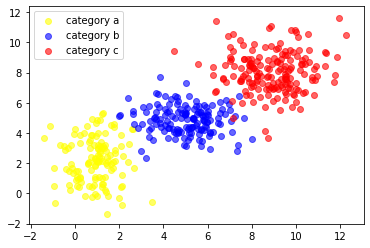

In [66]:
import matplotlib.pyplot as plt

plt.scatter(cat1[0],cat1[1], label="category a", alpha=0.6, color="yellow")
plt.scatter(cat2[0],cat2[1], label="category b", alpha=0.6, color="blue"  )
plt.scatter(cat3[0],cat3[1], label="category c", alpha=0.6, color="red"   )
plt.legend(loc="upper left")
plt.show()

--2021-12-10 10:18:40--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6022:18::a27d:4212
Connessione a www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2021-12-10 10:18:40--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc0ea73121f4bb2684b1ef6ebe0d.dl.dropboxusercontent.com/cd/0/inline/BbmXc7vurk0Y2HOGmz3RHpulLH4pb7x-v-GC8lDVAGUR9L5o4Pu2hPibMdpYXfe0M359M316paKCkSol9fhCBgyZPSWTOaY1QxJ-cbPyo-yIM0137ZX4CbdN5Y0V5RtS810lhlHICRWn2qhMF51DnbMR/file# [segue]
--2021-12-10 10:18:41--  https://uc0ea73121f4bb2684b1ef6ebe0d.dl.dropboxusercontent.com/cd/0/inline/BbmX

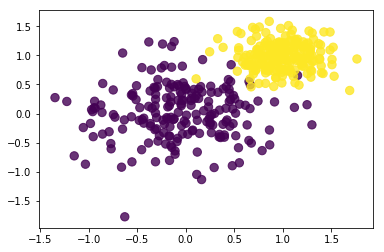

In [7]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [67]:
#load dataset as a pandas dataframe
import pandas as pd
import numpy as np

file_name = "/home/matteo/Scrivania/LaboratoryOfComputationalPhysics_Y4/residuals_261.npy"
array = np.load(file_name, allow_pickle=True)
dataframe = pd.DataFrame(array.item())
dataframe

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [68]:
#selecting rows with |residuals|<2
df = dataframe[np.abs(dataframe['residuals'])<2]
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [76]:
#linear regression of residuals vs distances
from scipy import stats
import matplotlib.pyplot as plt

slope, intercept, r_value, p_value, std_err = stats.linregress(df)

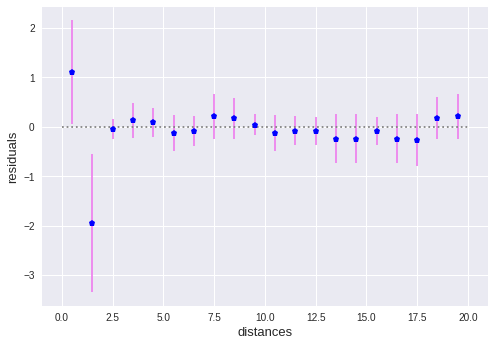

In [101]:
#numpy arrays
x = np.arange(0.5, 20.5, 1) #bin centers for distance
y = df['residuals'].head(20) #values of residuals
erry = np.sqrt(abs(y)) #std error of residuals

#plot of residuals vs distances with errorbars
plt.xlabel('distances', fontsize=13)
plt.ylabel('residuals', fontsize=13)
plt.errorbar(x, y, erry, marker='p', linestyle='', ecolor='violet', fmt='blue')
plt.hlines(y=0, xmin=0, xmax=20, colors='grey', linestyles='dotted') #horizontal line
plt.show()

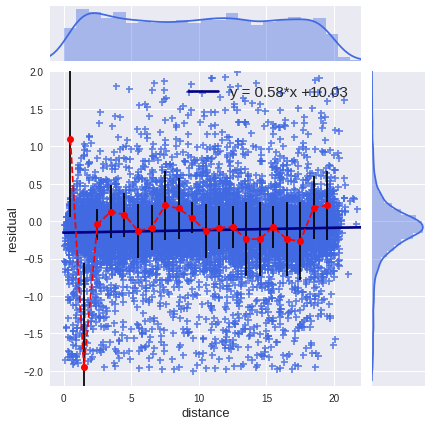

In [150]:
#seaborn jointplot with seaborn linear regression: profile plot on top of the scatter plot
import seaborn as sns

p = sns.jointplot(x=df['distances'], y=df['residuals'], data=df, kind='reg', marker='+', color='royalblue',
                 joint_kws={'line_kws': {'color': 'navy'},});
plt.errorbar(x, y, erry, marker='o', linestyle='--', ecolor='black', fmt='red')
plt.xlim(-1,22)
plt.xlabel('distance', fontsize=13)
plt.ylim(-2.2,2)
plt.ylabel('residual', fontsize=13)
plt.legend(['y = '+str(f'{slope:.2f}')+'*x +'+str(f'{intercept:.2f}')], loc='upper right', fontsize=15, shadow=True)

plt.show()